# 7.4. Estimating the correlation between two variables with a contingency table and a chi-squared test

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

In [3]:
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


In [4]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

(0.0, 0.1629310344827586)

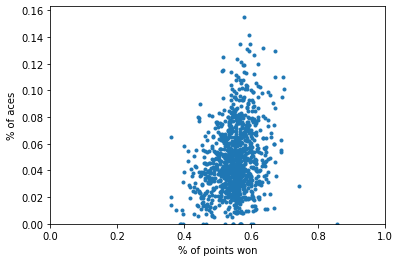

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

In [6]:
df_bis = pd.DataFrame({'points': points,
                       'aces': aces}).dropna()
df_bis.tail()

,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [7]:
df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [8]:
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

In [10]:
df_bis.tail()

,points,aces,result,manyaces
1173,0.585366,0.024390,True,False
1174,0.471014,0.039855,False,False
1175,0.639535,0.046512,True,True
1176,0.606061,0.020202,True,False
1177,0.531792,0.069364,False,True


In [11]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


In [12]:
st.chi2_contingency(_)

(27.809858855369555,
 1.338423379963363e-07,
 1,
 array([[257.25024343, 256.74975657],
        [256.74975657, 256.25024343]]))

In [13]:
?st.chi2_contingency

Signature: st.chi2_contingency(observed, correction=True, lambda_=None)
Docstring:
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the
hypothesis test of independence of the observed frequencies in the
contingency table [1]_ `observed`.  The expected frequencies are computed
based on the marginal sums under the assumption of independence; see
`scipy.stats.contingency.expected_freq`.  The number of degrees of
freedom is (expressed using numpy functions and attributes)::

    dof = observed.size - sum(observed.shape) + observed.ndim - 1


Parameters
----------
observed : array_like
    The contingency table. The table contains the observed frequencies
    (i.e. number of occurrences) in each category.  In the two-dimensional
    case, the table is often described as an "R x C table".
correction : bool, optional
    If True, *and* the degrees of freedom is 1, apply Yates' correction
    for continuity.  